NoSQL DBs are flexible DBs, unlike SQL DBs which are tabular in nature. Since SQL is tabular in Nature it can have null values present in the columns where fields are empty that create irregularity. In such cases, we can go for NoSQL DBs like MongoDB Because in NoSQL DBs like MongoDB we put data in a JSON Object. 

NoSQL is preferable when you want flexibility like in startups where things may change in the future with respect to the opportunities they get as here it’s not bound to a particular structure. But for well-established companies where operations are fixed they can go for SQL DBs in general.

See the following difference between two most popular SQL and NoSQL Dbs-

|MySQL|MongoDB|
|:-:|:-:|
|Matured or stable|Its new and updated frequently|
|It follows tabular structure|It follows document structure like JSON format|
|It needs a proper schema| Its flexible in nature|
|Managing complex relations among different tables is easy|Its not that great in complex managing relationship|
|Its scales vertically| Horizontaly scalable|

## 19.3.3 Pymongo

use the following command in your anaconda prompt to install pymongo

```
python -m pip install pymongo
```

Or you can directly run below cell to install pymongo in current environment-

# Below is described how to connect python to mondoDB on your local machine and perform operations

In [1]:
import pymongo

In [2]:
pymongo.version

'3.4.0'

In [3]:
DEFAULT_CONNECTION_URL =  "mongodb://localhost:27017/"
DB_NAME = "ineuron"

# Establlish connection with mongoDB
client = pymongo.MongoClient(DEFAULT_CONNECTION_URL) # creates client instance

# Create a DB
dataBase = client[DB_NAME]          # creates database instance
dataBase

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ineuron')

In [4]:
client


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

* connect to your mongodatabase in windows - launch mongodb in windows and add the connection url "mongodb://localhost:27017/"

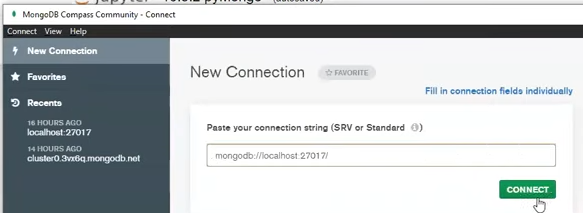

* make sure that the same port is active/connected in you windows

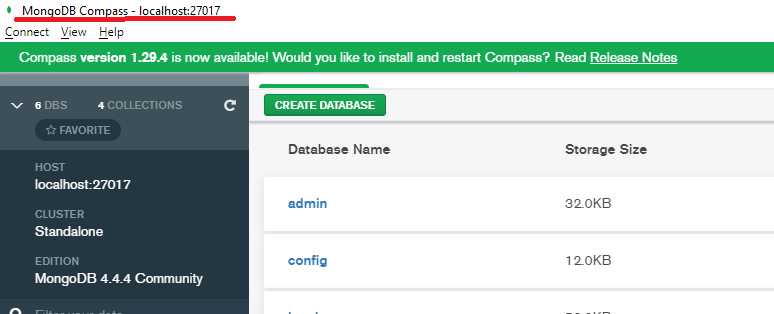

### Note - in order to see your database you need to save some data on it first

In [5]:
client.list_database_names()

for db in client.list_databases():
    print(db)

TypeError: 'Database' object is not callable. If you meant to call the 'list_database_names' method on a 'MongoClient' object it is failing because no such method exists.

In [6]:
# let's verify whether we have our database in the list or not 
# we'll use the following function:-

def checkExistence_DB(DB_NAME, client):
    """It verifies the existence of DB"""
    DBlist = client.list_database_names()
    if DB_NAME in DBlist:
        print(f"DB: '{DB_NAME}' exists")
        return True
    print(f"DB: '{DB_NAME}' not yet present OR no collection is present in the DB")
    return False


_ = checkExistence_DB(DB_NAME=DB_NAME, client=client)

TypeError: 'Database' object is not callable. If you meant to call the 'list_database_names' method on a 'MongoClient' object it is failing because no such method exists.

### STEP 2: Create a collection

In [7]:
COLLECTION_NAME = "iNeuron_Products"
collection = dataBase[COLLECTION_NAME]     # creates the collection(table in sql) instance

In [8]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ineuron'), 'iNeuron_Products')

In [9]:
# let's verify whether we have our database in the list or not 
# we'll use the following function:-

def checkExistence_COL(COLLECTION_NAME, DB_NAME, db):
    """It verifies the existence of collection name in a database"""
    collection_list = db.list_collection_names()
    
    if COLLECTION_NAME in collection_list:
        print(f"Collection:'{COLLECTION_NAME}' in Database:'{DB_NAME}' exists")
        return True
    
    print(f"Collection:'{COLLECTION_NAME}' in Database:'{DB_NAME}' does not exists OR \n\
    no documents are present in the collection")
    return False


_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

TypeError: 'Collection' object is not callable. If you meant to call the 'list_collection_names' method on a 'Database' object it is failing because no such method exists.

### * in sql is called table data but in mongodb is called a collection

* database, collection, document

### STEP 3: Insert a record in the collection

In [10]:
# JSON format data ,

record = {'companyName': 'iNeuron',
         'product': 'Affordable AI',
         'courseOffered': 'Deep Learning for Computer Vision',
         'name' : ["sudhan","kumar",5466],
         "record_dict" :{"name" :"sudhanshu" , "mail_id" : "sudhanshu@fadfsaf.ai","ph_number" :543535}}

collection.insert_one(record)     # inserts (updates) the info in record to the collection(table) - creates a document

In [13]:
_ = checkExistence_DB(DB_NAME=DB_NAME, client=client)

TypeError: 'Database' object is not callable. If you meant to call the 'list_database_names' method on a 'MongoClient' object it is failing because no such method exists.

In [14]:
_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

TypeError: 'Collection' object is not callable. If you meant to call the 'list_collection_names' method on a 'Database' object it is failing because no such method exists.

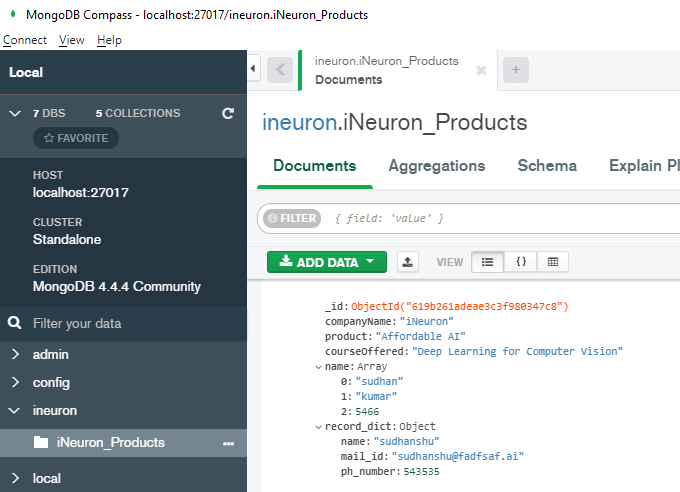

* by default the program creates its own _id but that can be set up also
* you can add more documents with different formats and it works ok, with sql you have to keep the schema otherwise you get into issues

### STEP 4: Insert multiple records

In [15]:
list_of_records = [
    {'companyName': 'iNeuron',
     'product': 'Affordable AI',
     'courseOffered': 'Machine Learning with Deployment'},
    
    {'companyName': 'iNeuron',
     'product': 'Affordable AI',
     'courseOffered': 'Deep Learning for NLP and Computer vision'},
    
    {'companyName': 'iNeuron',
     'product': 'Master Program',
     'courseOffered': 'Data Science Masters Program',
    "test" : "ffsdfsffsf",
     "complex" : [{"name" : "sudhanshu","list" : [554,545,454,54,5,4]},{"email_id" :"sudhanshu@dffsf"},{"phone_no":345345345353},[4,54,534,5,45,5,45,4]]

    }]
    
rec = collection.insert_many(list_of_records)    # inserts several documents at the same time

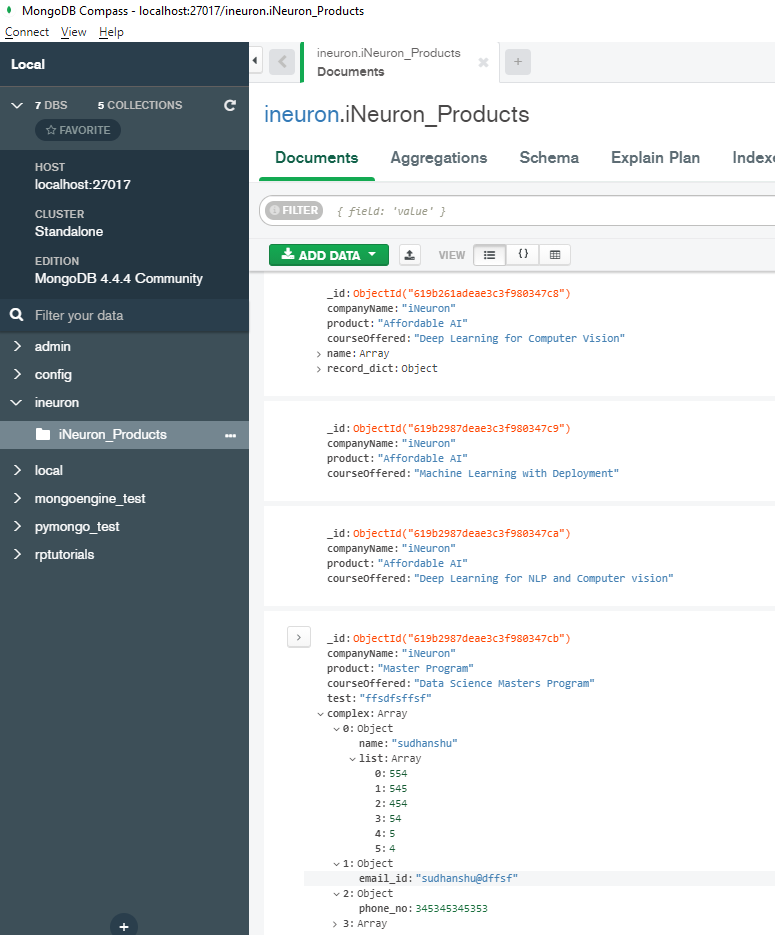

In [16]:
collection.find_one()

{'_id': ObjectId('619b261adeae3c3f980347c8'),
 'companyName': 'iNeuron',
 'product': 'Affordable AI',
 'courseOffered': 'Deep Learning for Computer Vision',
 'name': ['sudhan', 'kumar', 5466],
 'record_dict': {'name': 'sudhanshu',
  'mail_id': 'sudhanshu@fadfsaf.ai',
  'ph_number': 543535}}

In [17]:
# lets print the unique ID that of the record that we have inserted - whatever is in variable "rec"
inserted_IDs = rec.inserted_ids

for idx, unique_ids in enumerate(inserted_IDs):
    print(f"{idx}. {unique_ids}")

0. 619bfda7deae3c0a8c991e7a
1. 619bfda7deae3c0a8c991e7b
2. 619bfda7deae3c0a8c991e7c


In [18]:
COLLECTION_NAME = "iNeuron_Faculties"   # another collection
faculties = dataBase[COLLECTION_NAME]   # creates the collection instance

list_of_records_user_defined_id = [
    {"_id": "6", "companyName": "iNeuron", "Faculty": "Sudhanshu Kumar"},
    {"_id": "8", "companyName": "iNeuron", "Faculty": "Virat Sagar"}]

faculties_record = faculties.insert_many(list_of_records_user_defined_id)  # user defined _id

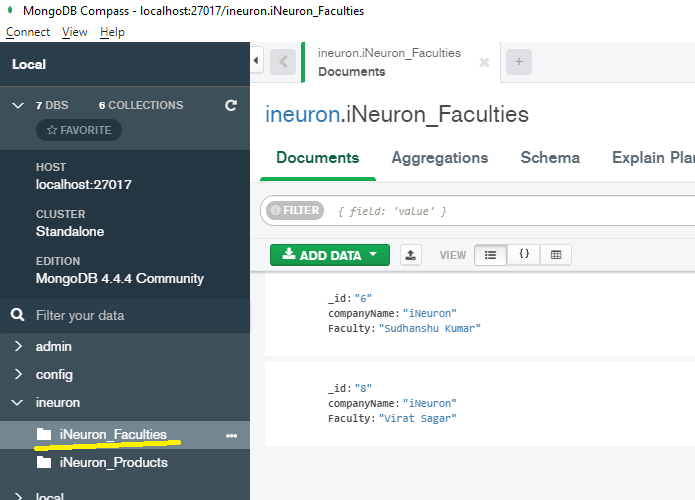

### STEP 5: Find method in MongoDB

In [20]:
find_first_record = faculties.find_one()   # finds the first record

print(f"The first record of collection: \n{COLLECTION_NAME} is=\
\n{find_first_record}")

The first record of collection: 
iNeuron_Faculties is=
{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}


In [21]:
all_record = faculties.find()            # finds all records

for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}
1:{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}


In [38]:
all_record = faculties.find({'_id':'6'})      # find specific record

for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}


In [39]:
all_record = faculties.find({"Faculty": "Virat Sagar"})      # find specific record

for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}


In [46]:
all_record = faculties.find({"Faculty":{"$in":['Sudhanshu Kumar']}})      # find specific record

for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}


In [47]:
all_record = faculties.find({"Faculty":{"$in":['Sudhanshu Kumar','Virat Sagar']}})      # find specific record range

for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}
1:{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}


### STEP 6: Query or filter out data in MongoDB

In [50]:
query1 = {"_id":"6"}

results = faculties.find(query1)
for data in results:
    print(data)

{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}


In [56]:
query2 = {"_id":{"$in":["8"]}}

results = faculties.find(query2)
for data in results:
    print(data)
    

{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}


### STEP 7: Delete one or many documents in MongoDB

In [57]:
# Lets add some random data in faculties
random_data = [
    {'_id': '3', 'companyName': 'iNeuron', 'Faculty': 'XYZ'},
    {'_id': '4', 'companyName': 'iNeuron', 'Faculty': 'ABC'},
    {'_id': '5', 'companyName': 'iNeuron', 'Faculty': 'PQR'}]

faculties.insert_many(random_data)

In [60]:
all_record = faculties.find()
for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}
1:{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}
2:{'_id': '3', 'companyName': 'iNeuron', 'Faculty': 'XYZ'}
3:{'_id': '4', 'companyName': 'iNeuron', 'Faculty': 'ABC'}
4:{'_id': '5', 'companyName': 'iNeuron', 'Faculty': 'PQR'}


In [62]:
query3 = {"_id":{"$gt":"5"}}

results = faculties.find(query3)
for data in results:
    print(data)
    

{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}
{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}


In [63]:
query_delete = {"Faculty" : "XYZ"}

faculties.delete_one(query_delete) # delete a specific record

all_record = faculties.find()
for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")


0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}
1:{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}
2:{'_id': '4', 'companyName': 'iNeuron', 'Faculty': 'ABC'}
3:{'_id': '5', 'companyName': 'iNeuron', 'Faculty': 'PQR'}


In [64]:
query_delete = {"_id" : {"$lt":"6"}}

faculties.delete_many(query_delete) # delete several specific records

all_record = faculties.find()
for idx,record in enumerate(all_record):
    print(f"{idx}:{record}")

0:{'_id': '6', 'companyName': 'iNeuron', 'Faculty': 'Sudhanshu Kumar'}
1:{'_id': '8', 'companyName': 'iNeuron', 'Faculty': 'Virat Sagar'}


> **NOTE**: In order to delete all the documents present in the collection you can just pass and empty dictionary as shown below: -
```python
faculties.delete_many({})
```

### STEP 8: Drop the entire collection

In [65]:
faculties.drop()        # drops entire collections

In [66]:
print(COLLECTION_NAME)
print(DB_NAME)
print(dataBase)

iNeuron_Faculties
ineuron
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ineuron')


In [67]:
_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

TypeError: 'Collection' object is not callable. If you meant to call the 'list_collection_names' method on a 'Database' object it is failing because no such method exists.

### STEP 9: Update

In [68]:
COLLECTION_NAME = "iNeuron_Products"

products = dataBase[COLLECTION_NAME]

all_record = products.find()
for idx,record in enumerate(all_record):
    print(f"{record}")

{'_id': ObjectId('619b261adeae3c3f980347c8'), 'companyName': 'iNeuron', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for Computer Vision', 'name': ['sudhan', 'kumar', 5466], 'record_dict': {'name': 'sudhanshu', 'mail_id': 'sudhanshu@fadfsaf.ai', 'ph_number': 543535}}
{'_id': ObjectId('619b2987deae3c3f980347c9'), 'companyName': 'iNeuron', 'product': 'Affordable AI', 'courseOffered': 'Machine Learning with Deployment'}
{'_id': ObjectId('619b2987deae3c3f980347ca'), 'companyName': 'iNeuron', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for NLP and Computer vision'}
{'_id': ObjectId('619b2987deae3c3f980347cb'), 'companyName': 'iNeuron', 'product': 'Master Program', 'courseOffered': 'Data Science Masters Program', 'test': 'ffsdfsffsf', 'complex': [{'name': 'sudhanshu', 'list': [554, 545, 454, 54, 5, 4]}, {'email_id': 'sudhanshu@dffsf'}, {'phone_no': 345345345353}, [4, 54, 534, 5, 45, 5, 45, 4]]}
{'_id': ObjectId('619bfd8cdeae3c0a8c991e79'), 'companyName': 'iNeur

In [69]:
present_data = {"companyName":"iNeuron"}
new_data={"$set":{"companyName":"iNeuron.ai"}}

products.update_many(present_data, new_data)  # updating info on several records
all_record=products.find()
for idx,record in enumerate(all_record):
    print(f"{record}")

{'_id': ObjectId('619b261adeae3c3f980347c8'), 'companyName': 'iNeuron.ai', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for Computer Vision', 'name': ['sudhan', 'kumar', 5466], 'record_dict': {'name': 'sudhanshu', 'mail_id': 'sudhanshu@fadfsaf.ai', 'ph_number': 543535}}
{'_id': ObjectId('619b2987deae3c3f980347c9'), 'companyName': 'iNeuron.ai', 'product': 'Affordable AI', 'courseOffered': 'Machine Learning with Deployment'}
{'_id': ObjectId('619b2987deae3c3f980347ca'), 'companyName': 'iNeuron.ai', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for NLP and Computer vision'}
{'_id': ObjectId('619b2987deae3c3f980347cb'), 'companyName': 'iNeuron.ai', 'product': 'Master Program', 'courseOffered': 'Data Science Masters Program', 'test': 'ffsdfsffsf', 'complex': [{'name': 'sudhanshu', 'list': [554, 545, 454, 54, 5, 4]}, {'email_id': 'sudhanshu@dffsf'}, {'phone_no': 345345345353}, [4, 54, 534, 5, 45, 5, 45, 4]]}
{'_id': ObjectId('619bfd8cdeae3c0a8c991e79'), 'companyN

### STEP 9: Set limit to view N records

In [70]:
N_records = 3

record_limited = products.find().limit(N_records)
for idx,record in enumerate(record_limited):
    print(f"{record}")

{'_id': ObjectId('619b261adeae3c3f980347c8'), 'companyName': 'iNeuron.ai', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for Computer Vision', 'name': ['sudhan', 'kumar', 5466], 'record_dict': {'name': 'sudhanshu', 'mail_id': 'sudhanshu@fadfsaf.ai', 'ph_number': 543535}}
{'_id': ObjectId('619b2987deae3c3f980347c9'), 'companyName': 'iNeuron.ai', 'product': 'Affordable AI', 'courseOffered': 'Machine Learning with Deployment'}
{'_id': ObjectId('619b2987deae3c3f980347ca'), 'companyName': 'iNeuron.ai', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for NLP and Computer vision'}
